In [2]:
from predict import *
from scipy import stats
import seaborn as sns
from sklearn.externals import joblib
%matplotlib inline

In [3]:
preparing_data = PreparingData()
input_filenames = ['temperture_2008.csv',
                   'amount_of_precipitation_2008.csv',
                   'hours_of_sunlight_2008.csv',
                   'wind_speed_2008.csv']
X_train, y_train = preparing_data.prepare_data(input_filenames, 'weather_2008.csv', 'demand_2008.csv')
df = preparing_data.get_created_df()

input_filenames = ['temperture_2010.csv',
                   'amount_of_precipitation_2010.csv',
                   'hours_of_sunlight_2010.csv',
                   'wind_speed_2010.csv']
temp_X, temp_y = preparing_data.prepare_data(input_filenames, 'weather_2010.csv', 'demand_2010.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))
df = df.append(preparing_data.get_created_df(), ignore_index=True)

input_filenames = ['temperture_2011.csv',
                   'amount_of_precipitation_2011.csv',
                   'hours_of_sunlight_2011.csv',
                   'wind_speed_2011.csv']
temp_X, temp_y = preparing_data.prepare_data(input_filenames, 'weather_2011.csv', 'demand_2011.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))
df = df.append(preparing_data.get_created_df(), ignore_index=True)

input_filenames = ['temperture_2012.csv',
                   'amount_of_precipitation_2012.csv',
                   'hours_of_sunlight_2012.csv',
                   'wind_speed_2012.csv']
temp_X, temp_y = preparing_data.prepare_data(input_filenames, 'weather_2012.csv', 'demand_2012.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))
df = df.append(preparing_data.get_created_df(), ignore_index=True)

input_filenames = ['temperture_2014.csv',
                   'amount_of_precipitation_2014.csv',
                   'hours_of_sunlight_2014.csv',
                   'wind_speed_2014.csv']
temp_X, temp_y = preparing_data.prepare_data(input_filenames, 'weather_2014.csv', 'demand_2014.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))
df = df.append(preparing_data.get_created_df(), ignore_index=True)

input_filenames = ['temperture_2016.csv',
                   'amount_of_precipitation_2016.csv',
                   'hours_of_sunlight_2016.csv',
                   'wind_speed_2016.csv']
X_test, y_test = preparing_data.prepare_data(input_filenames, 'weather_2016.csv', 'demand_2016.csv', demand_header=2)
test_df = preparing_data.get_created_df()

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
reg = RandomForestRegressor(random_state=0, n_jobs=-1)

def objective(params):
    global reg
    reg = set_params(params, reg)
    return cross_validation(reg, X_train, y_train)
space = [(1, 1e5),  # n_estimators
         (1, 1e5),  # max_depth
         (1, X_train.shape[1]),  # max_features
         (2, 1e5),  # min_samples_split
         (1, 1e5)]  # min_samples_leaf
res_gp = gp_minimize(objective, space, n_calls=200, random_state=0, verbose=0, n_jobs=-1)
math.sqrt(res_gp.fun)
reg = set_params(res_gp.x, reg)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
math.sqrt(mean_squared_error(y_pred, y_test))
joblib.dump(reg, 'predict_power_usage.pkl') 

In [5]:
all_data_difference = y_pred - y_test

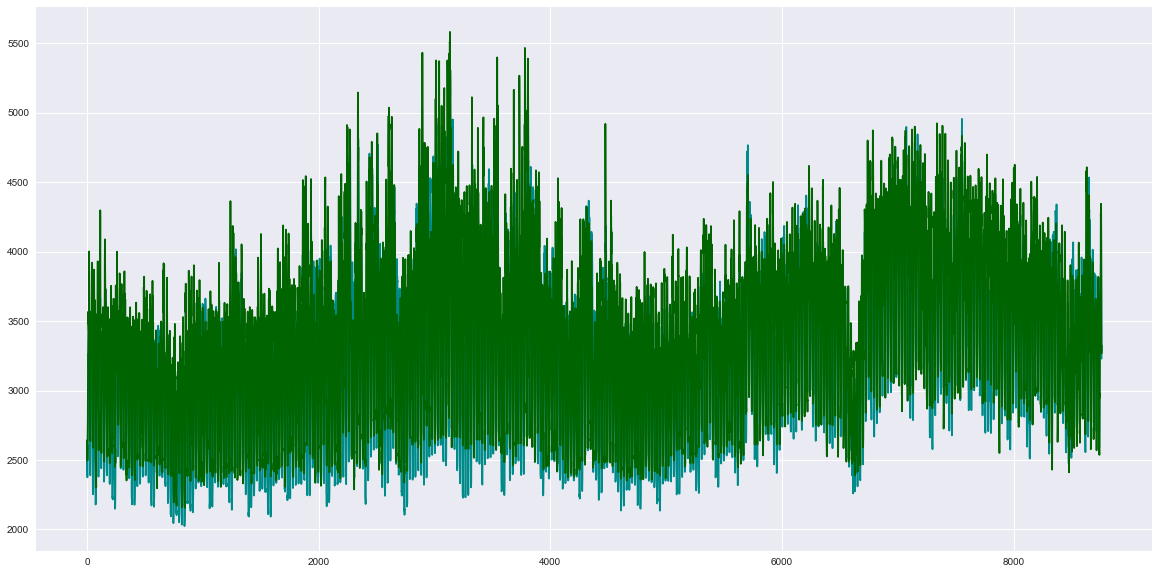

In [6]:
# 緑が予測、青が実測
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_test, color='darkcyan')
plt.plot(range(0, X_test.shape[0]), y_pred, color='darkgreen')
plt.savefig('comparison.png')
plt.show()

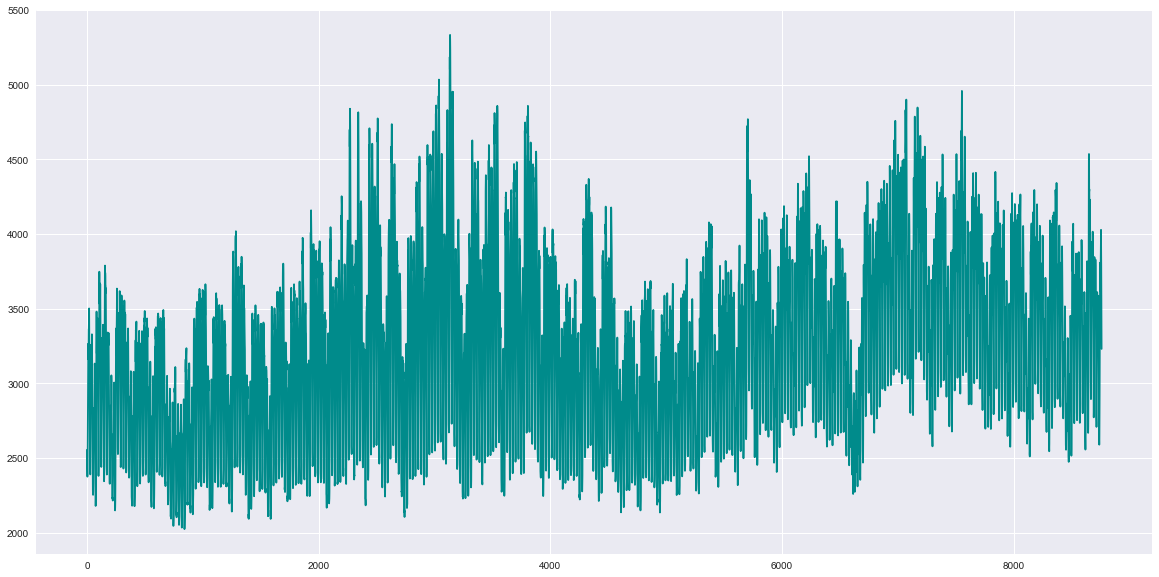

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_test, color='darkcyan')
plt.savefig('test.png')
plt.show()

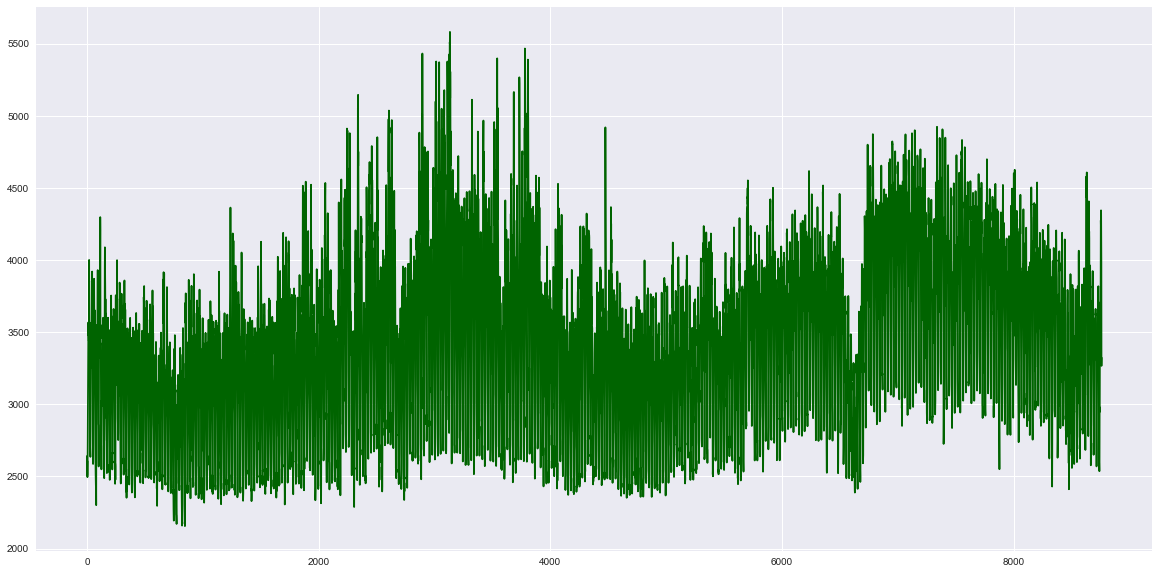

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_pred, color='darkgreen')
plt.savefig('pred.png')
plt.show()

In [9]:
# 電力需要に関わる単一のデータを使用した場合
X_train = df[['月', '日' , '時']]
y_train = df[['電力需要']].values
X_test = test_df[['月', '日' , '時']]
y_test = test_df[['電力需要']].values

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
reg = RandomForestRegressor(random_state=0, n_jobs=-1)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
# def objective(params):
#     global reg
#     reg = set_params(params, reg)
#     return cross_validation(reg, X_train, y_train)
# space = [(1, 1e5),  # n_estimators
#          (1, 1e5),  # max_depth
#          (1, X_train.shape[1]),  # max_features
#          (2, 1e5),  # min_samples_split
#          (1, 1e5)]  # min_samples_leaf
# res_gp = gp_minimize(objective, space, n_calls=10, random_state=0, verbose=0, n_jobs=-1)
# math.sqrt(res_gp.fun)
# reg = set_params(res_gp.x, reg)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
math.sqrt(mean_squared_error(y_pred, y_test))

378.79920832411

In [12]:
part_of_data_difference = y_pred - y_test

In [13]:
t, p = stats.ttest_rel(all_data_difference, part_of_data_difference)

In [14]:
p

4.8413945627091301e-16

In [15]:
all_data_difference

array([  86.8,   78.2,  215.7, ...,  357.8, -195.8,   93.9])

In [16]:
part_of_data_difference

array([ 397.41111111,  381.89357143,  296.29825397, ...,  -36.51142857,
        -53.66940476,  -40.69380952])

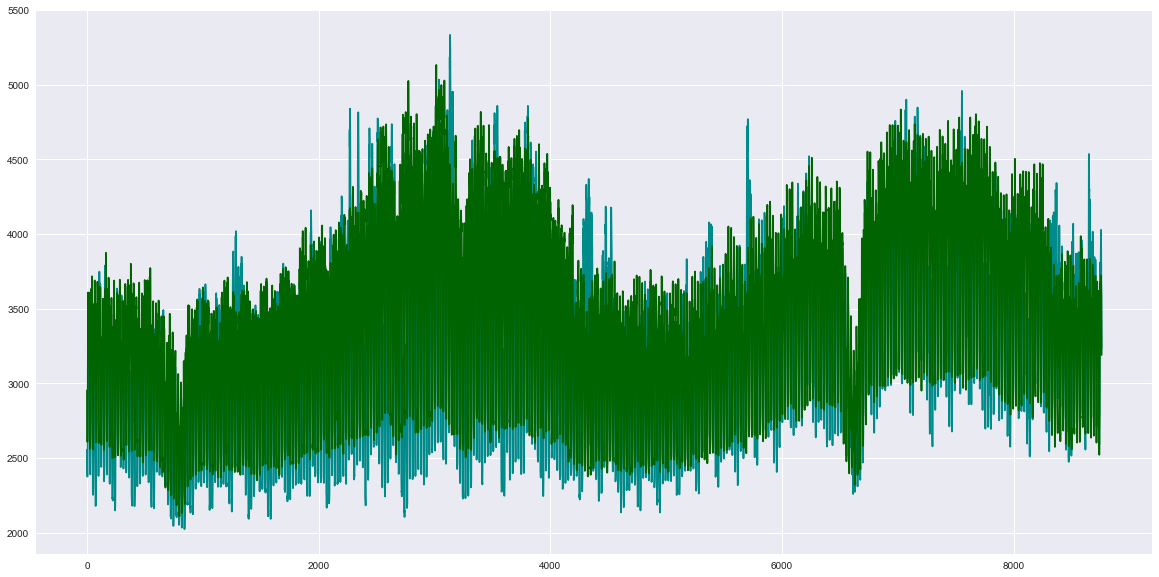

In [17]:
# 緑が予測、青が実測
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_test, color='darkcyan')
plt.plot(range(0, X_test.shape[0]), y_pred, color='darkgreen')
plt.savefig('part_of_data_comparison.png')
plt.show()

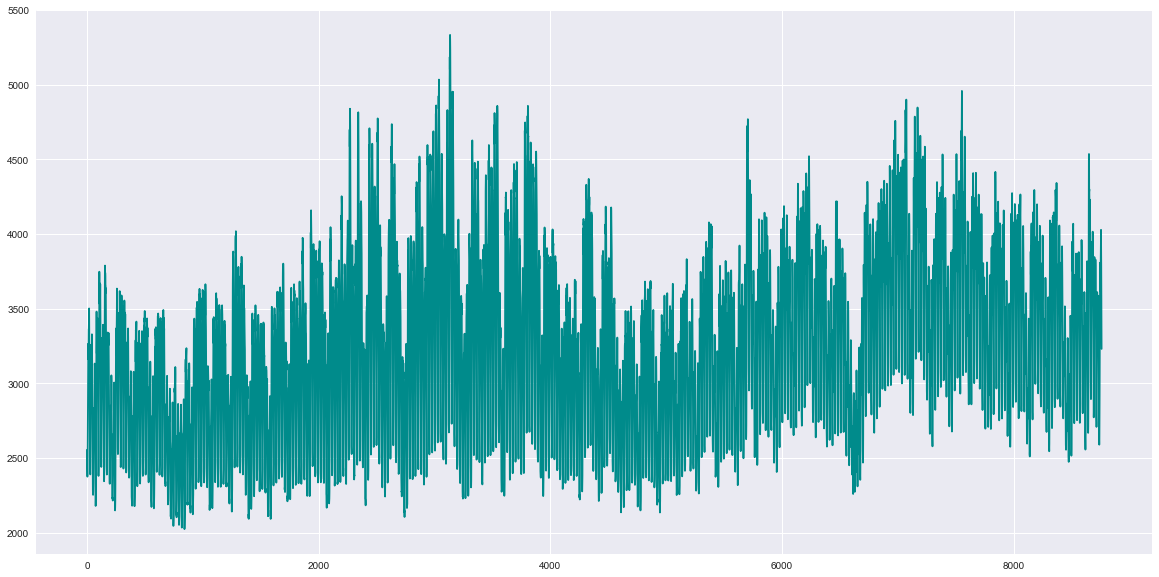

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_test, color='darkcyan')
plt.savefig('part_of_data_test.png')
plt.show()

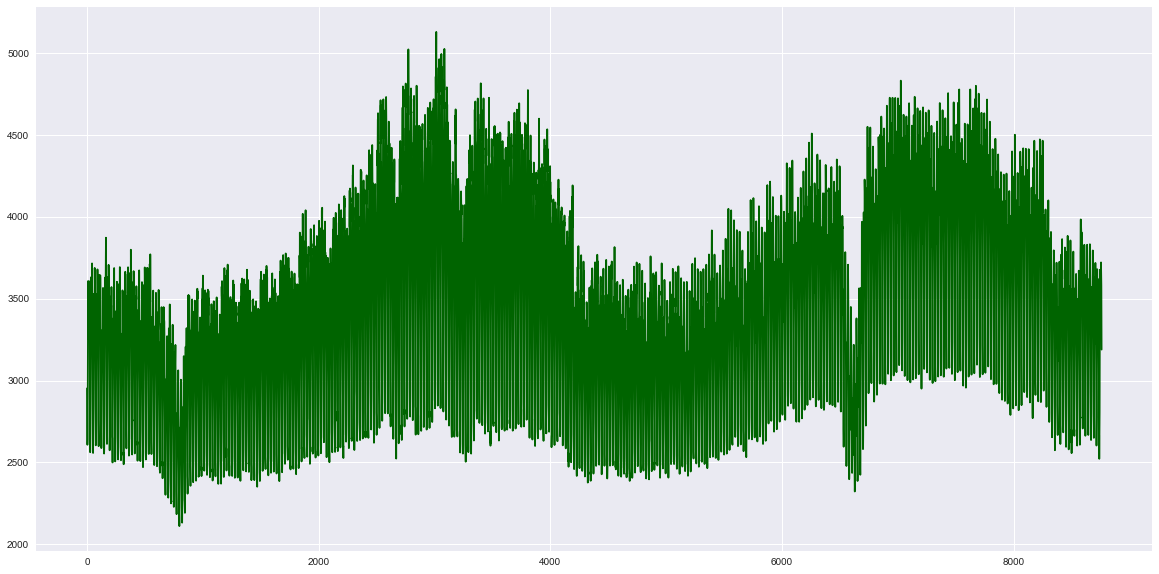

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_pred, color='darkgreen')
plt.savefig('part_of_data_pred.png')
plt.show()